In [56]:
import time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [57]:
# SPDX-License-Identifier: BSD-3-Clause
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# # Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Sparsity with L1 penalty: 65.64%
Test score with L1 penalty: 0.8274
Example run in 8.857 s


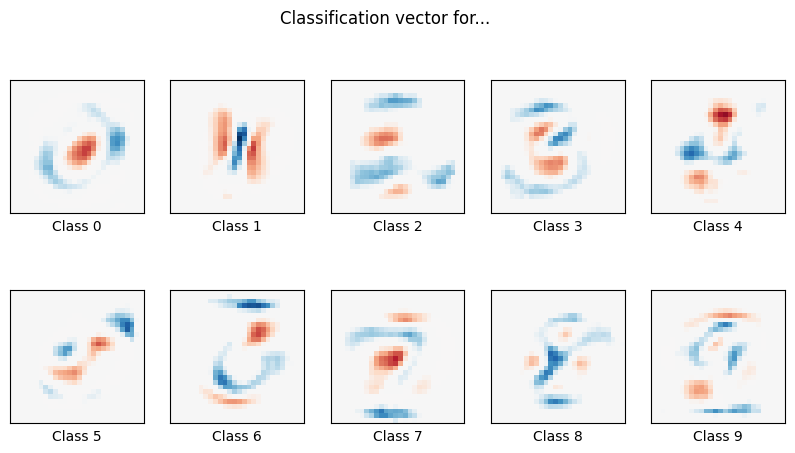

In [58]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
(clf.score(X_test, y_test))


0.8854

In [60]:
# FFNN from Sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2 hidden layers (100 neurons each)
ffnn = MLPClassifier(hidden_layer_sizes=(200, 200), activation='relu', solver='adam', max_iter=50)
ffnn.fit(X_train, y_train)
ffnn.score(X_test, y_test)

0.9372

c:\El\IF3270_Tubes1_FFNN\src\utils.py:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Validation Accuracy: 0.5006
Epoch 1/100 - Loss: 6.0489
Validation Loss: 6.0608
Validation Accuracy: 0.6564
Epoch 2/100 - Loss: 6.0418
Validation Loss: 6.0734
Validation Accuracy: 0.7335
Epoch 3/100 - Loss: 6.0523
Validation Loss: 6.0963
Validation Accuracy: 0.8005
Epoch 4/100 - Loss: 6.0584
Validation Loss: 6.0787
Validation Accuracy: 0.8394
Epoch 5/100 - Loss: 6.0623
Validation Loss: 6.0873
Validation Accuracy: 0.8604
Epoch 6/100 - Loss: 6.0657
Validation Loss: 6.0838
Validation Accuracy: 0.8725
Epoch 7/100 - Loss: 6.0679
Validation Loss: 6.1217
Validation Accuracy: 0.8853
Epoch 8/100 - Loss: 6.0681
Validation Loss: 6.0966
Validation Accuracy: 0.8899
Epoch 9/100 - Loss: 6.0678
Validation Loss: 6.0999
Validation Accuracy: 0.8973
Epoch 10/100 - Loss: 6.0663
Validation Loss: 6.1143
Validation Accuracy: 0.8999
Epoch 11/100 - Loss: 6.0648
Validation Loss: 6.1104
Validation Accuracy: 0.9029
Epoch 12/100 - Loss: 6.0634
Validation Loss: 6.1331
Validation Accuracy: 0.9063
Epoch 13/100 - Loss: 

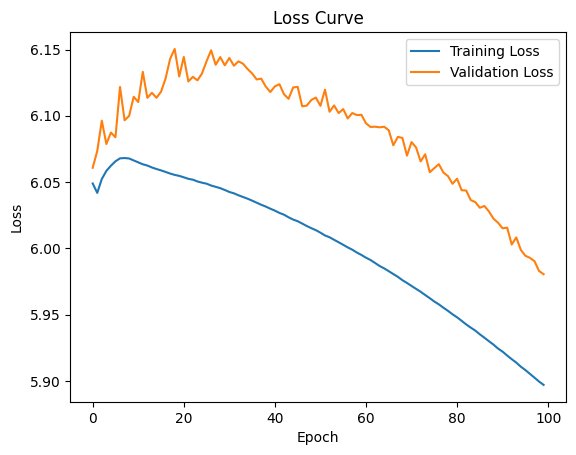

None


In [73]:
from importlib import reload
import main  # Memastikan file 'main' diimpor
reload(main)  # Memuat ulang file main.py
from main import FFNN

ffnn_model = FFNN(
    layers=[X_train.shape[1], 100, 100, 100, 100, 100, len(set(y_train))],  # Input, hidden 1, hidden 2, output
    activation_functions=['swish', 'swish', 'swish', 'swish', 'swish', 'swish'],
    loss_function='mse',
    weight_method='xavier',
    seed=42,
    regularization="l2",
    rms_norm=False
)
a = ffnn_model.train(X_train, y_train, X_test, y_test, epochs=100, learning_rate=0.001, batch_size=200)
print(a)

Bawah ngetes bonus

In [ ]:
# L1 regularisation (Lasso)
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

-0.0002375437494799293

In [ ]:
# L2 regularisation (Ridge)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test,y_test)

-1.9293922899402767

In [68]:
from utils import RMSNorm

# Contoh penggunaan RMSNorm
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])  # Contoh input 2D
rmsnorm = RMSNorm(dim=x.shape[1])  # Inisialisasi dengan dimensi yang sesuai (3 fitur)
output = rmsnorm(x)  # Terapkan RMSNorm
print(output)


[[0.46291005 0.9258201  1.38873015]
 [0.78954203 0.98692754 1.18431305]]
